<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ACopy_of_Copy_of_Copy_of_Copy_of_fft_r1_model_single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-normal-n-0-3-r10.csv?token=AKVFSOHOEBDNZWLE36SL2NC6ZK3FM')
print(df.shape)
df

(31858, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,142,2,4,4,1,1,5,17,24,8,3,3,3,5,2,0.40,12,5,1,5,5,25,8,4,4,12,20,85,100,1
1,143,2,4,4,2,2,5,17,24,8,3,3,3,5,2,0.40,13,4,2,5,8,40,8,8,16,48,20,85,100,1
2,144,2,4,4,3,2,5,17,24,8,3,3,3,5,2,0.40,14,3,3,5,9,45,8,12,24,72,20,85,100,1
3,145,2,4,4,4,2,5,17,24,8,3,3,3,5,2,0.40,15,2,4,5,8,40,8,16,32,96,20,85,100,1
4,149,2,4,4,5,3,5,17,24,8,3,3,3,5,2,0.40,19,1,5,5,5,25,8,20,60,180,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31853,3268217,1,3,5,3,2,3,9,3,3,30,14,20036,4,3,0.75,30,1,1,1,1,1,3,15,30,601080,15,27,45,1
31854,3268224,1,3,5,4,2,3,9,3,3,30,14,20036,4,3,0.75,37,1,1,1,1,1,3,20,40,801440,15,27,45,1
31855,3268231,1,3,5,5,3,3,9,3,3,30,14,20036,4,3,0.75,44,1,1,1,1,1,3,25,75,1502700,15,27,45,1
31856,3268232,1,3,1,1,4,3,10,3,3,30,14,20037,4,3,0.75,44,1,1,1,1,1,3,1,4,80148,3,30,9,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-1-r10.csv?token=AKVFSOHQI5US2GJHRLWQOZK6ZK3HY', nrows=35000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-6-r10.csv?token=AKVFSOGUXD5UZ6ETZK3EYTS6ZK3H4', nrows=35000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-9-r10.csv?token=AKVFSOHS5LVX6EJOUPQ7GK26ZK3IA', nrows=35000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-14-r10.csv?token=AKVFSOF7OCO5CYU7FFNYMZS6ZK3IC', nrows=35000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-normal-n-0-12-r10.csv?token=AKVFSOADLPFPZ2L5CAAPY5C6ZK3MQ')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-normal-n-0-15-r10.csv?token=AKVFSOBMYOMVHB3Q5FW767K6ZK3MS')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-normal-n-0-5-r10.csv?token=AKVFSOADH4W523I64FWHJ426ZK3MW')

In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(35000, 30)
(35000, 30)
(35000, 30)
(35000, 30)
(33360, 30)
(33710, 30)
(31527, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [7]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,9,9,23,7,3,3,1,0.333333,8,1,1,1,1,1,8,1,4,12,3,27,9,0
1,80,1,3,4,1,1,5,17,23,7,14,14,3,3,2,0.666667,12,5,1,5,5,25,3,4,4,12,20,85,100,0
2,81,1,3,4,2,2,5,17,23,7,14,14,3,3,2,0.666667,13,4,2,5,8,40,3,8,16,48,20,85,100,0
3,82,1,3,4,3,2,5,17,23,7,14,14,3,3,2,0.666667,14,3,3,5,9,45,3,12,24,72,20,85,100,0
4,83,1,3,4,4,2,5,17,23,7,14,14,3,3,2,0.666667,15,2,4,5,8,40,3,16,32,96,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270450,3275767,2,4,4,1,1,5,17,24,8,15,15,20062,4,2,0.500000,13,1,1,1,1,1,8,4,4,80248,20,85,100,1
270451,3275768,2,4,4,2,2,5,17,24,8,15,15,20062,4,2,0.500000,14,1,1,1,1,1,8,8,16,320992,20,85,100,1
270452,3275769,2,4,4,3,2,5,17,24,8,15,15,20062,4,2,0.500000,15,1,1,1,1,1,8,12,24,481488,20,85,100,1
270453,3275770,2,4,4,4,2,5,17,24,8,15,15,20062,4,2,0.500000,16,1,1,1,1,1,8,16,32,641984,20,85,100,1


In [8]:
df.shape

(270455, 30)

Test Data

In [9]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-13-r10.csv?token=AKVFSOHKEMNTSRVOHME2G6K6ZK3TA', nrows=30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-normal-n-0-10-r10.csv?token=AKVFSOH5ZRPPTOVQAQXJWY26ZK3TE', nrows=30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-2-r10.csv?token=AKVFSOBPSFMHFC2EY2JHCMS6ZK3TK', nrows=30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-5-r10.csv?token=AKVFSOCCHGJMRR7GI5QT4YK6ZK3TM', nrows=30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-10-r10.csv?token=AKVFSOA3MLKYKLGM2BTN7426ZK3TQ', nrows=30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-12-r10.csv?token=AKVFSOGFO4YMSDVMESTNMZS6ZK3TU', nrows=30000)
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-15-r10.csv?token=AKVFSODL3MYNOCUM5VRQ3JK6ZK3TY', nrows=30000)
df5.shape

(30000, 30)

In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,142,2,4,4,1,1,5,17,24,8,3,3,4,5,2,0.4,12,5,1,5,5,25,8,4,4,16,20,85,100,0
1,143,2,4,4,2,2,5,17,24,8,3,3,4,5,2,0.4,13,4,2,5,8,40,8,8,16,64,20,85,100,0
2,144,2,4,4,3,2,5,17,24,8,3,3,4,5,2,0.4,14,3,3,5,9,45,8,12,24,96,20,85,100,0
3,145,2,4,4,4,2,5,17,24,8,3,3,4,5,2,0.4,15,2,4,5,8,40,8,16,32,128,20,85,100,0
4,149,2,4,4,5,3,5,17,24,8,3,3,4,5,2,0.4,19,1,5,5,5,25,8,20,60,240,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2449724,4,0,6,4,2,3,11,26,10,24,8,18988,2,0,0.0,25,1,1,1,1,1,0,24,48,911424,18,33,54,0
29996,2449731,4,0,6,5,3,3,11,26,10,24,8,18988,2,0,0.0,32,1,1,1,1,1,0,30,90,1708920,18,33,54,0
29997,2449732,4,0,2,1,4,3,12,26,10,24,8,18990,2,0,0.0,32,1,1,1,1,1,0,2,8,151920,6,36,18,0
29998,2449733,2,0,7,1,4,3,9,26,10,3,3,18988,3,0,0.0,5,1,1,1,1,1,0,7,28,531664,21,27,63,0


In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.563050,0.165482,0.051953,-0.078058,0.224929,0.273718,0.060546,0.045339,-0.758237,-0.874520,-0.386610,-0.087754,-0.013153,-0.061490,-0.042611,-0.035948,0.491268,0.090536,0.070648,0.081524,0.316894,0.245533,0.295075,0.132598
inport,-0.563050,1.000000,-0.278027,0.011473,-0.017248,0.255991,0.174055,-0.023852,0.365250,0.584427,0.574770,0.058827,-0.000844,-0.036954,-0.023030,-0.040654,-0.043438,0.384717,-0.117356,-0.101574,-0.085805,-0.025321,0.223757,0.151170,-0.175331
cache_coherence_type,0.165482,-0.278027,1.000000,0.236678,-0.355745,-0.245382,-0.238021,0.036388,-0.126673,-0.180308,-0.212564,-0.148102,0.029922,-0.004412,0.015545,0.023621,0.026277,-0.126829,0.481612,0.394623,0.298724,0.631340,-0.243317,0.145521,0.008943
flit_id,0.051953,0.011473,0.236678,1.000000,-0.036968,0.235353,0.217593,0.001974,0.114671,0.029036,-0.031744,0.354627,-0.030966,0.058457,0.016747,0.016937,0.010003,0.076175,0.943128,0.899415,0.641506,0.384157,0.229041,0.333903,-0.006767
flit_type,-0.078058,-0.017248,-0.355745,-0.036968,1.000000,-0.353756,-0.327060,-0.002986,-0.172348,-0.043661,0.047690,0.293181,-0.056133,0.066113,0.006076,-0.006240,-0.002262,-0.114471,-0.094670,0.176437,0.126891,-0.577420,-0.344269,-0.501885,0.010193
vnet,0.224929,0.255991,-0.245382,0.235353,-0.353756,1.000000,0.984532,-0.024886,0.479097,-0.089635,-0.207300,-0.452124,-0.040653,0.003779,-0.022471,-0.031402,-0.040652,0.540004,0.022187,-0.027738,-0.037426,0.596877,0.997468,0.923399,-0.053804
vc,0.273718,0.174055,-0.238021,0.217593,-0.327060,0.984532,1.000000,-0.024955,0.442432,-0.156399,-0.281374,-0.450726,-0.035797,0.024244,-0.007042,-0.015425,-0.026349,0.494174,0.012723,-0.031237,-0.040542,0.590596,0.994491,0.910528,-0.049886
traversal_id,0.060546,-0.023852,0.036388,0.001974,-0.002986,-0.024886,-0.024955,1.000000,0.025739,-0.017335,-0.032850,0.012343,-0.348759,-0.348819,-0.425061,-0.322607,-0.244727,0.045024,0.015129,0.013175,0.548269,0.010208,-0.025001,-0.010989,0.085640
hop_count,0.045339,0.365250,-0.126673,0.114671,-0.172348,0.479097,0.442432,0.025739,1.000000,0.401248,-0.012418,-0.042515,-0.094104,-0.075839,-0.103554,-0.095193,-0.083428,0.458425,-0.011654,-0.025694,-0.008079,0.278422,0.466002,0.438791,0.113048
current_hop,-0.758237,0.584427,-0.180308,0.029036,-0.043661,-0.089635,-0.156399,-0.017335,0.401248,1.000000,0.853542,0.481526,0.011907,-0.065384,-0.032582,-0.035798,-0.029505,-0.182878,-0.034732,-0.045514,-0.041305,-0.220934,-0.117015,-0.162870,-0.002635


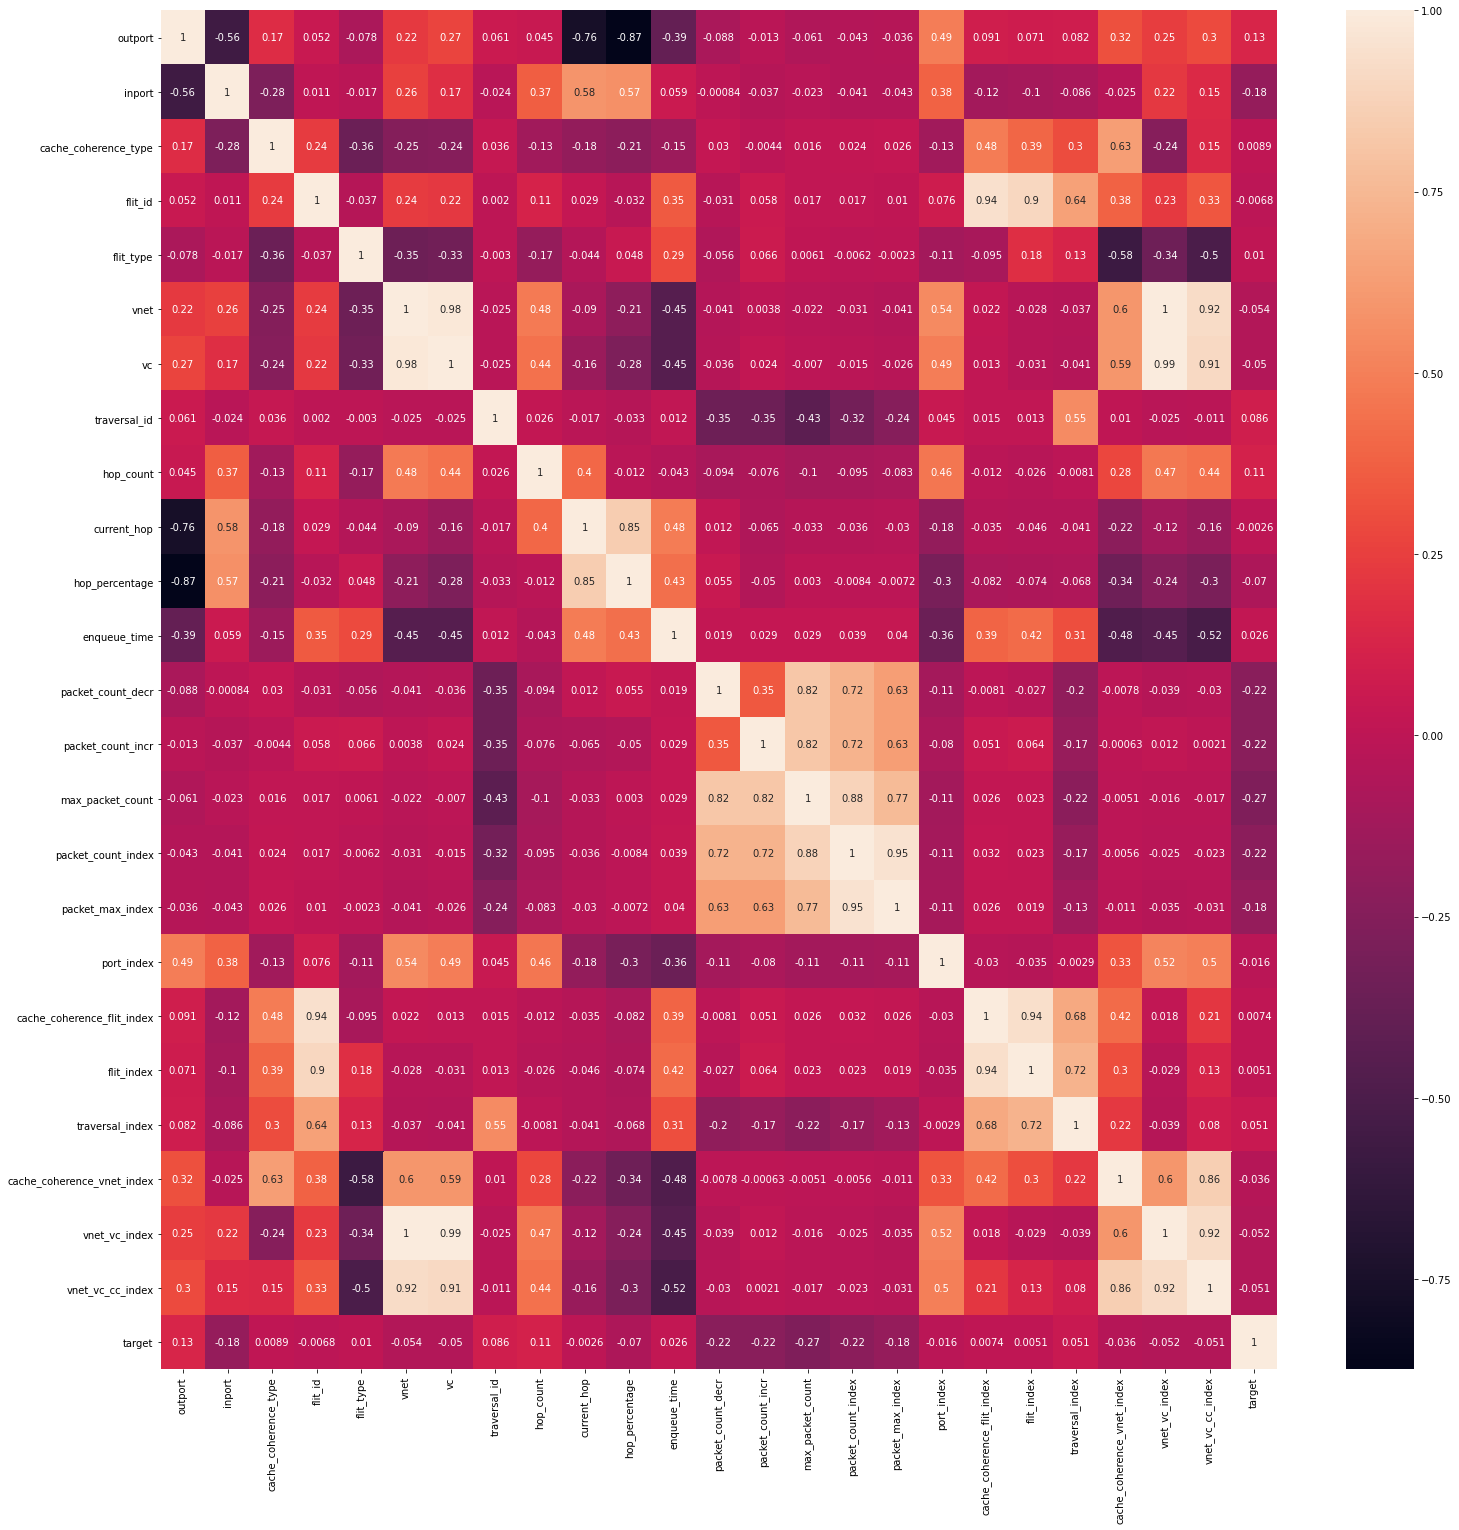

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [15]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,4,1,1,4,3,9,3,3,1,0.333333,8,1,1,1,1,1,8,1,4,12,3,27,9
1,1,3,4,1,1,5,17,3,3,2,0.666667,12,5,1,5,5,25,3,4,4,12,20,85,100
2,1,3,4,2,2,5,17,3,3,2,0.666667,13,4,2,5,8,40,3,8,16,48,20,85,100
3,1,3,4,3,2,5,17,3,3,2,0.666667,14,3,3,5,9,45,3,12,24,72,20,85,100
4,1,3,4,4,2,5,17,3,3,2,0.666667,15,2,4,5,8,40,3,16,32,96,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270450,2,4,4,1,1,5,17,20062,4,2,0.500000,13,1,1,1,1,1,8,4,4,80248,20,85,100
270451,2,4,4,2,2,5,17,20062,4,2,0.500000,14,1,1,1,1,1,8,8,16,320992,20,85,100
270452,2,4,4,3,2,5,17,20062,4,2,0.500000,15,1,1,1,1,1,8,12,24,481488,20,85,100
270453,2,4,4,4,2,5,17,20062,4,2,0.500000,16,1,1,1,1,1,8,16,32,641984,20,85,100


In [16]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.25,0.333333,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.25,0.75,0.5,0.00,0.000000,1.0,0.888889,0.000000,0.50,0.50,0.666667,0.126984,0.114286,0.000000,0.114286,0.011730,0.001949,0.250000,0.103448,0.000000,0.000000,0.944444,0.920635,1.0
2,0.25,0.75,0.5,0.25,0.333333,1.0,0.888889,0.000000,0.50,0.50,0.666667,0.142857,0.085714,0.028571,0.114286,0.020528,0.003168,0.250000,0.241379,0.139535,0.000018,0.944444,0.920635,1.0
3,0.25,0.75,0.5,0.50,0.333333,1.0,0.888889,0.000000,0.50,0.50,0.666667,0.158730,0.057143,0.057143,0.114286,0.023460,0.003574,0.250000,0.379310,0.232558,0.000030,0.944444,0.920635,1.0
4,0.25,0.75,0.5,0.75,0.333333,1.0,0.888889,0.000000,0.50,0.50,0.666667,0.174603,0.028571,0.085714,0.114286,0.020528,0.003168,0.250000,0.517241,0.325581,0.000041,0.944444,0.920635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270450,0.50,1.00,0.5,0.00,0.000000,1.0,0.888889,0.890403,0.75,0.50,0.500000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.103448,0.000000,0.039618,0.944444,0.920635,1.0
270451,0.50,1.00,0.5,0.25,0.333333,1.0,0.888889,0.890403,0.75,0.50,0.500000,0.158730,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.158488,0.944444,0.920635,1.0
270452,0.50,1.00,0.5,0.50,0.333333,1.0,0.888889,0.890403,0.75,0.50,0.500000,0.174603,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.237736,0.944444,0.920635,1.0
270453,0.50,1.00,0.5,0.75,0.333333,1.0,0.888889,0.890403,0.75,0.50,0.500000,0.190476,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.517241,0.325581,0.316983,0.944444,0.920635,1.0


In [17]:
train_X[train_X.duplicated()].shape

(9001, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [19]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.0,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.000000,0.5,0.4,0.140351,0.117647,0.000000,0.117647,0.012384,0.002117,1.0,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.5,1.0,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.000000,0.5,0.4,0.157895,0.088235,0.029412,0.117647,0.021672,0.003439,1.0,0.241379,0.139535,0.000028,0.944444,0.920635,1.000000
2,0.5,1.0,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.000000,0.5,0.4,0.175439,0.058824,0.058824,0.117647,0.024768,0.003880,1.0,0.379310,0.232558,0.000047,0.944444,0.920635,1.000000
3,0.5,1.0,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.000000,0.5,0.4,0.192982,0.029412,0.088235,0.117647,0.021672,0.003439,1.0,0.517241,0.325581,0.000066,0.944444,0.920635,1.000000
4,0.5,1.0,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.000000,0.5,0.4,0.263158,0.000000,0.117647,0.117647,0.012384,0.002117,1.0,0.655172,0.651163,0.000131,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.833333,0.75,0.333333,0.0,0.222222,0.999895,0.000000,0.0,0.0,0.368421,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.533329,0.833333,0.095238,0.494505
29996,1.0,0.0,0.833333,1.00,0.666667,0.0,0.222222,0.999895,0.000000,0.0,0.0,0.491228,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.833333,0.095238,0.494505
29997,1.0,0.0,0.166667,0.00,1.000000,0.0,0.333333,1.000000,0.000000,0.0,0.0,0.491228,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.088890,0.166667,0.142857,0.098901
29998,0.5,0.0,1.000000,0.00,1.000000,0.0,0.000000,0.999895,0.333333,0.0,0.0,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.206897,0.279070,0.311105,1.000000,0.000000,0.593407


In [20]:
test_X[test_X.duplicated()].shape

(24, 24)

In [21]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.4,0.00,0.0,0.000000,0.24,0.00,0.24,0.033149,0.010146,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.75,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.4,0.50,1.0,0.166667,0.20,0.04,0.24,0.060773,0.017544,0.0,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
2,0.0,0.75,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.4,0.50,1.0,0.187500,0.16,0.08,0.24,0.077348,0.021983,0.0,0.241379,0.139535,0.000037,0.944444,0.920635,1.000000
3,0.0,0.75,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.4,0.50,1.0,0.208333,0.12,0.12,0.24,0.082873,0.023462,0.0,0.379310,0.232558,0.000062,0.944444,0.920635,1.000000
4,0.0,0.75,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.4,0.50,1.0,0.229167,0.08,0.16,0.24,0.077348,0.021983,0.0,0.517241,0.325581,0.000087,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.75,0.500000,0.75,0.333333,1.0,0.888889,0.999862,0.6,0.75,1.0,0.333333,0.04,0.16,0.20,0.049724,0.012471,0.0,0.517241,0.325581,0.358023,0.944444,0.920635,1.000000
29996,0.0,0.75,0.500000,1.00,0.666667,1.0,0.888889,0.999862,0.6,0.75,1.0,0.416667,0.00,0.20,0.20,0.027624,0.007398,0.0,0.655172,0.651163,0.671303,0.944444,0.920635,1.000000
29997,1.0,0.00,0.666667,0.00,0.000000,0.0,0.222222,1.000000,0.6,0.00,0.0,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.0,0.137931,0.011628,0.055938,0.666667,0.095238,0.395604
29998,1.0,0.00,0.666667,0.25,0.333333,0.0,0.222222,1.000000,0.6,0.00,0.0,0.145833,0.00,0.00,0.00,0.000000,0.000000,0.0,0.310345,0.186047,0.223790,0.666667,0.095238,0.395604


In [22]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(12, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.140351,0.290323,0.000000,0.290323,0.033210,0.011375,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.50,1.0,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.157895,0.258065,0.032258,0.290323,0.062731,0.020568,0.666667,0.241379,0.139535,0.000031,0.944444,0.920635,1.000000
2,0.50,1.0,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.175439,0.225806,0.064516,0.290323,0.084871,0.027462,0.666667,0.379310,0.232558,0.000052,0.944444,0.920635,1.000000
3,0.50,1.0,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.192982,0.193548,0.096774,0.290323,0.099631,0.032058,0.666667,0.517241,0.325581,0.000073,0.944444,0.920635,1.000000
4,0.50,1.0,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.263158,0.161290,0.129032,0.290323,0.107011,0.034356,0.666667,0.655172,0.651163,0.000145,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.75,1.0,0.500000,0.50,0.333333,1.0,0.888889,0.999883,0.666667,0.50,0.50,0.175439,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.379310,0.232558,0.266706,0.944444,0.920635,1.000000
29996,0.75,1.0,0.500000,0.75,0.333333,1.0,0.888889,0.999883,0.666667,0.50,0.50,0.192982,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.517241,0.325581,0.355611,0.944444,0.920635,1.000000
29997,0.75,1.0,0.500000,1.00,0.666667,1.0,0.888889,0.999883,0.666667,0.50,0.50,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.655172,0.651163,0.666780,0.944444,0.920635,1.000000
29998,1.00,0.5,0.333333,0.00,1.000000,0.0,0.000000,1.000000,0.666667,0.25,0.25,0.070175,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.068966,0.093023,0.133363,0.333333,0.000000,0.197802


In [23]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(23, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.0,0.5,0.00,0.000000,1.0,0.888889,0.000000,1.000000,0.50,0.400000,0.137931,0.133333,0.000000,0.133333,0.015686,0.003025,1.0,0.103448,0.000000,0.000000,0.944444,0.920635,1.0
1,0.5,1.0,0.5,0.25,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.400000,0.155172,0.100000,0.033333,0.133333,0.027451,0.004915,1.0,0.241379,0.139535,0.000027,0.944444,0.920635,1.0
2,0.5,1.0,0.5,0.50,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.400000,0.172414,0.066667,0.066667,0.133333,0.031373,0.005545,1.0,0.379310,0.232558,0.000045,0.944444,0.920635,1.0
3,0.5,1.0,0.5,0.75,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.400000,0.189655,0.033333,0.100000,0.133333,0.027451,0.004915,1.0,0.517241,0.325581,0.000063,0.944444,0.920635,1.0
4,0.5,1.0,0.5,1.00,0.666667,1.0,0.888889,0.000000,1.000000,0.50,0.400000,0.258621,0.000000,0.133333,0.133333,0.015686,0.003025,1.0,0.655172,0.651163,0.000126,0.944444,0.920635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.5,0.5,1.00,0.666667,1.0,0.888889,0.999798,0.333333,0.25,0.333333,0.189655,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.655172,0.651163,0.667068,0.944444,0.920635,1.0
29996,1.0,0.5,0.5,0.00,0.000000,1.0,0.888889,1.000000,1.000000,0.25,0.200000,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.103448,0.000000,0.044472,0.944444,0.920635,1.0
29997,1.0,0.5,0.5,0.25,0.333333,1.0,0.888889,1.000000,1.000000,0.25,0.200000,0.086207,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.241379,0.139535,0.177914,0.944444,0.920635,1.0
29998,1.0,0.5,0.5,0.50,0.333333,1.0,0.888889,1.000000,1.000000,0.25,0.200000,0.103448,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.266876,0.944444,0.920635,1.0


In [24]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.00000,0.4,0.00,0.0,0.000000,0.161290,0.000000,0.16129,0.01845,0.004022,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00,0.75,0.500000,0.00,0.000000,1.0,0.888889,0.00000,0.4,0.50,1.0,0.142857,0.129032,0.032258,0.16129,0.03321,0.006779,0.00,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
2,0.00,0.75,0.500000,0.25,0.333333,1.0,0.888889,0.00000,0.4,0.50,1.0,0.160714,0.096774,0.064516,0.16129,0.04059,0.008158,0.00,0.241379,0.139535,0.000045,0.944444,0.920635,1.000000
3,0.00,0.75,0.500000,0.50,0.333333,1.0,0.888889,0.00000,0.4,0.50,1.0,0.178571,0.064516,0.096774,0.16129,0.04059,0.008158,0.00,0.379310,0.232558,0.000075,0.944444,0.920635,1.000000
4,0.00,0.75,0.500000,0.75,0.333333,1.0,0.888889,0.00000,0.4,0.50,1.0,0.196429,0.032258,0.129032,0.16129,0.03321,0.006779,0.00,0.517241,0.325581,0.000105,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.50,0.500000,0.50,0.333333,1.0,0.888889,0.99978,1.0,0.25,0.2,0.125000,0.000000,0.000000,0.00000,0.00000,0.000000,1.00,0.379310,0.232558,0.272903,0.944444,0.920635,1.000000
29996,1.00,0.50,0.500000,0.75,0.333333,1.0,0.888889,0.99978,1.0,0.25,0.2,0.142857,0.000000,0.000000,0.00000,0.00000,0.000000,1.00,0.517241,0.325581,0.363876,0.944444,0.920635,1.000000
29997,1.00,0.50,0.500000,1.00,0.666667,1.0,0.888889,0.99978,1.0,0.25,0.2,0.214286,0.000000,0.000000,0.00000,0.00000,0.000000,1.00,0.655172,0.651163,0.682281,0.944444,0.920635,1.000000
29998,0.00,0.50,0.500000,0.00,0.000000,1.0,0.888889,1.00000,0.2,0.25,1.0,0.071429,0.000000,0.000000,0.00000,0.00000,0.000000,0.00,0.103448,0.000000,0.045481,0.944444,0.920635,1.000000


In [25]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(24, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.000000,0.50,0.400000,0.142857,0.153846,0.000000,0.153846,0.020513,0.004536,1.0,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.5,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.400000,0.160714,0.115385,0.038462,0.153846,0.035897,0.007371,1.0,0.241379,0.139535,0.000028,0.944444,0.920635,1.000000
2,0.5,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.400000,0.178571,0.076923,0.076923,0.153846,0.041026,0.008316,1.0,0.379310,0.232558,0.000047,0.944444,0.920635,1.000000
3,0.5,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.400000,0.196429,0.038462,0.115385,0.153846,0.035897,0.007371,1.0,0.517241,0.325581,0.000066,0.944444,0.920635,1.000000
4,0.5,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.000000,0.50,0.400000,0.267857,0.000000,0.153846,0.153846,0.020513,0.004536,1.0,0.655172,0.651163,0.000131,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.50,0.833333,1.00,0.666667,0.0,0.000000,0.999895,0.333333,0.25,0.333333,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505
29996,1.0,0.50,0.166667,0.00,1.000000,0.0,0.111111,0.999947,0.333333,0.25,0.333333,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.034483,0.046512,0.088885,0.166667,0.047619,0.098901
29997,1.0,0.50,1.000000,0.00,1.000000,0.0,0.222222,0.999895,1.000000,0.25,0.200000,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.206897,0.279070,0.311105,1.000000,0.095238,0.593407
29998,0.0,0.75,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.333333,0.75,1.000000,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.137931,0.011628,0.055553,0.666667,0.000000,0.395604


In [26]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(47, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.0,0.5,0.4,0.133333,0.300000,0.000000,0.3,0.035294,0.012476,1.000,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.50,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.0,0.5,0.4,0.150000,0.266667,0.033333,0.3,0.066667,0.022558,1.000,0.241379,0.139535,0.000028,0.944444,0.920635,1.000000
2,0.50,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.0,0.5,0.4,0.166667,0.233333,0.066667,0.3,0.090196,0.030120,1.000,0.379310,0.232558,0.000047,0.944444,0.920635,1.000000
3,0.50,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.0,0.5,0.4,0.183333,0.200000,0.100000,0.3,0.105882,0.035161,1.000,0.517241,0.325581,0.000066,0.944444,0.920635,1.000000
4,0.50,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.0,0.5,0.4,0.250000,0.166667,0.133333,0.3,0.113725,0.037681,1.000,0.655172,0.651163,0.000131,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.00,1.00,0.333333,0.00,1.000000,0.0,0.000000,0.999631,0.0,0.5,1.0,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.068966,0.093023,0.133332,0.333333,0.000000,0.197802
29996,0.25,0.75,0.666667,0.00,0.000000,0.0,0.000000,1.000000,1.0,1.0,0.8,0.266667,0.000000,0.000000,0.0,0.000000,0.000000,0.375,0.137931,0.011628,0.055570,0.666667,0.000000,0.395604
29997,0.25,0.75,0.666667,0.25,0.333333,0.0,0.000000,1.000000,1.0,1.0,0.8,0.383333,0.000000,0.000000,0.0,0.000000,0.000000,0.375,0.310345,0.186047,0.222309,0.666667,0.000000,0.395604
29998,0.25,0.75,0.666667,0.50,0.333333,0.0,0.000000,1.000000,1.0,1.0,0.8,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.375,0.482759,0.302326,0.333468,0.666667,0.000000,0.395604


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [28]:
train_Y = df['target']
train_Y.value_counts()

0    140000
1    130455
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  4591.902253
13           packet_count_incr  2307.896504
12           packet_count_decr  2284.040867
15          packet_count_index  1672.859044
1                       inport  1058.529279
16            packet_max_index   893.287319
0                      outport   821.000839
8                    hop_count   368.656168
5                         vnet   361.859847
22               vnet_vc_index   291.668138
7                 traversal_id   256.051334
6                           vc   231.189443
10              hop_percentage   219.285774
23            vnet_vc_cc_index    99.716534
20             traversal_index    93.576355
21  cache_coherence_vnet_index    25.316717
11                enqueue_time    18.233734


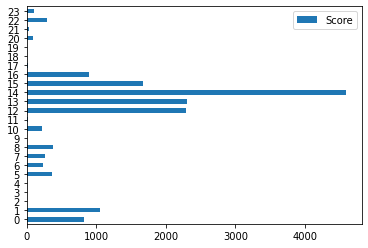

In [31]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [34]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 66.57808138137582
Test Prediction  67.05551755375201


In [36]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  71.69333333333333


In [37]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  25.566666666666666


In [38]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  79.44


In [39]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  79.06


In [40]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  79.73


In [41]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  69.02000000000001


In [42]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  70.91333333333333


In [43]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
18,cache_coherence_flit_index,3.739522
16,packet_max_index,3.621801
8,hop_count,2.531327
10,hop_percentage,2.487370
0,outport,1.477069
6,vc,0.658503
4,flit_type,0.044815
19,flit_index,0.010285
15,packet_count_index,-0.045062
22,vnet_vc_index,-0.145277


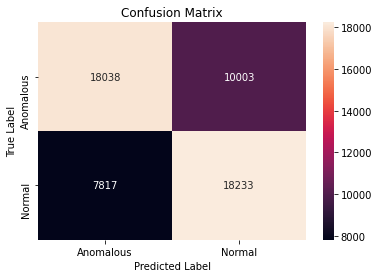

In [44]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67     28041
           1       0.65      0.70      0.67     26050

    accuracy                           0.67     54091
   macro avg       0.67      0.67      0.67     54091
weighted avg       0.67      0.67      0.67     54091



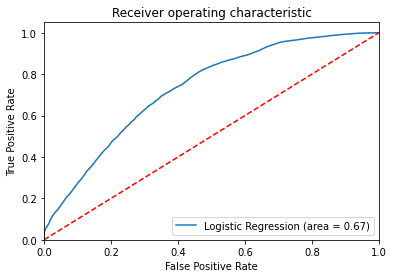

In [46]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

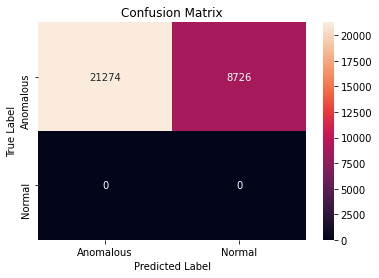

In [47]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [48]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.71     30000
   macro avg       0.50      0.35      0.41     30000
weighted avg       1.00      0.71      0.83     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [49]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [51]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 85.73930968183247
Test Prediction  78.08323011221829


In [52]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  45.85666666666667


In [53]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  16.49


In [54]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  68.0


In [55]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  46.653333333333336


In [56]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  87.15


In [57]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  51.93333333333333


In [58]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  49.843333333333334


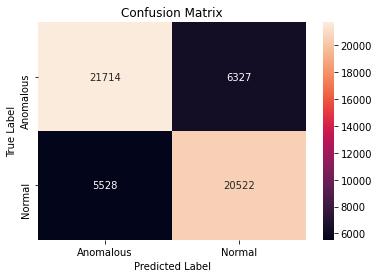

In [59]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79     28041
           1       0.76      0.79      0.78     26050

    accuracy                           0.78     54091
   macro avg       0.78      0.78      0.78     54091
weighted avg       0.78      0.78      0.78     54091



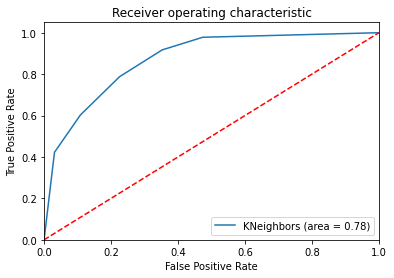

In [61]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

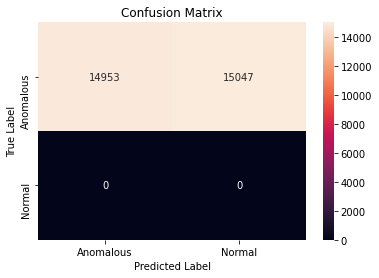

In [64]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [65]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.50     30000
   macro avg       0.50      0.25      0.33     30000
weighted avg       1.00      0.50      0.67     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [67]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [69]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 58.6738089515816
Test Prediction Score 58.610489730269364


In [70]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 19.79


In [71]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  48.79666666666667


In [72]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  27.650000000000002


In [73]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  20.783333333333335


In [74]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  57.53333333333334


In [75]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  22.85


In [76]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  22.856666666666666


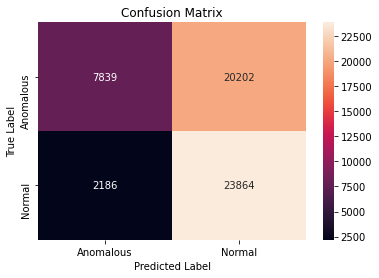

In [77]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [78]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.78      0.28      0.41     28041
           1       0.54      0.92      0.68     26050

    accuracy                           0.59     54091
   macro avg       0.66      0.60      0.55     54091
weighted avg       0.67      0.59      0.54     54091



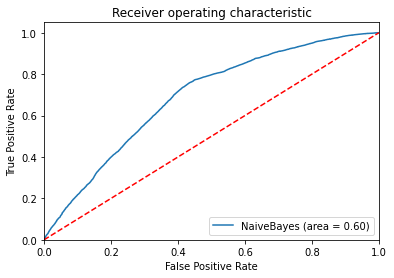

In [79]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [80]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [81]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 173091 samples, validate on 43273 samples
Epoch 1/10
173091/173091 [==============================] - 7s 39us/step - loss: 0.2252 - accuracy: 0.6117 - val_loss: 0.2205 - val_accuracy: 0.6326
Epoch 2/10
173091/173091 [==============================] - 6s 37us/step - loss: 0.2161 - accuracy: 0.6546 - val_loss: 0.2148 - val_accuracy: 0.6582
Epoch 3/10
173091/173091 [==============================] - 6s 37us/step - loss: 0.2127 - accuracy: 0.6686 - val_loss: 0.2128 - val_accuracy: 0.6688
Epoch 4/10
173091/173091 [==============================] - 7s 38us/step - loss: 0.2117 - accuracy: 0.6710 - val_loss: 0.2121 - val_accuracy: 0.6681
Epoch 5/10
173091/173091 [==============================] - 6s 37us/step - loss: 0.2112 - accuracy: 0.6715 - val_loss: 0.2116 - val_accuracy: 0.6678
Epoch 6/10
173091/173091 [==============================] - 7s 38us/step - loss: 0.2108 - accuracy: 0.6711 - val_loss: 0.2118 - val_accuracy: 0.6686
Epoch 7/10
173091/173091 [=============================

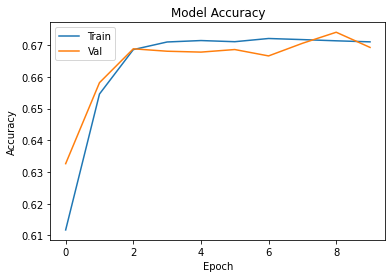

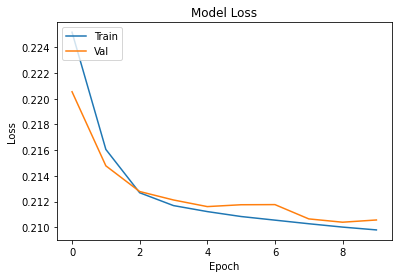

In [82]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [83]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.65%


In [84]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.97%


In [85]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 26.65%


In [86]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.61%


In [87]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.17%


In [88]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.91%


In [89]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.24%


In [90]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.83%


3-Layer Neural Network

In [91]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 173091 samples, validate on 43273 samples
Epoch 1/30
173091/173091 [==============================] - 7s 40us/step - loss: 0.2499 - accuracy: 0.5141 - val_loss: 0.2498 - val_accuracy: 0.5142
Epoch 2/30
173091/173091 [==============================] - 7s 43us/step - loss: 0.2497 - accuracy: 0.5166 - val_loss: 0.2498 - val_accuracy: 0.5154
Epoch 3/30
173091/173091 [==============================] - 6s 37us/step - loss: 0.2497 - accuracy: 0.5174 - val_loss: 0.2498 - val_accuracy: 0.5157
Epoch 4/30
173091/173091 [==============================] - 6s 36us/step - loss: 0.2497 - accuracy: 0.5176 - val_loss: 0.2498 - val_accuracy: 0.5159
Epoch 5/30
173091/173091 [==============================] - 6s 37us/step - loss: 0.2497 - accuracy: 0.5177 - val_loss: 0.2498 - val_accuracy: 0.5160
Epoch 6/30
173091/173091 [==============================] - 6s 37us/step - loss: 0.2497 - accuracy: 0.5177 - val_loss: 0.2497 - val_accuracy: 0.5160
Epoch 7/30
173091/173091 [=============================

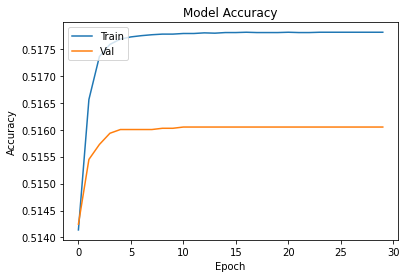

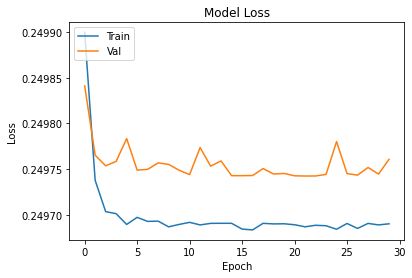

In [92]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [93]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 51.84%


In [94]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 0.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%


4-Layer Neural Network



In [95]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 173091 samples, validate on 43273 samples
Epoch 1/30
173091/173091 [==============================] - 7s 38us/step - loss: 0.2397 - accuracy: 0.5673 - val_loss: 0.2279 - val_accuracy: 0.6196
Epoch 2/30
173091/173091 [==============================] - 7s 38us/step - loss: 0.2184 - accuracy: 0.6526 - val_loss: 0.2098 - val_accuracy: 0.6702
Epoch 3/30
173091/173091 [==============================] - 7s 38us/step - loss: 0.2034 - accuracy: 0.6776 - val_loss: 0.1996 - val_accuracy: 0.6777
Epoch 4/30
173091/173091 [==============================] - 7s 38us/step - loss: 0.1962 - accuracy: 0.6892 - val_loss: 0.1944 - val_accuracy: 0.6907
Epoch 5/30
173091/173091 [==============================] - 6s 37us/step - loss: 0.1922 - accuracy: 0.6990 - val_loss: 0.1912 - val_accuracy: 0.7065
Epoch 6/30
173091/173091 [==============================] - 7s 38us/step - loss: 0.1891 - accuracy: 0.7062 - val_loss: 0.1886 - val_accuracy: 0.7099
Epoch 7/30
173091/173091 [=============================

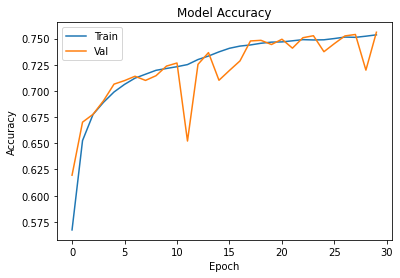

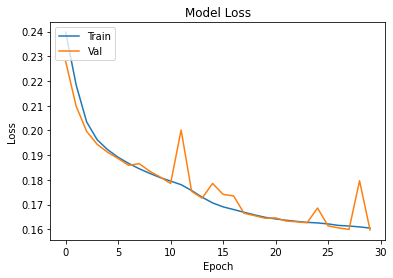

In [96]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [97]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.17%


In [98]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 47.09%
accuracy: 20.47%
accuracy: 63.06%
accuracy: 50.07%
accuracy: 80.44%
accuracy: 32.21%
accuracy: 35.91%


5-Layer Neural Network Optimized

In [99]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 173091 samples, validate on 43273 samples
Epoch 1/100
173091/173091 [==============================] - 13s 76us/step - loss: 0.1823 - accuracy: 0.7134 - val_loss: 0.1733 - val_accuracy: 0.7345
Epoch 2/100
173091/173091 [==============================] - 12s 68us/step - loss: 0.1661 - accuracy: 0.7424 - val_loss: 0.1604 - val_accuracy: 0.7434
Epoch 3/100
173091/173091 [==============================] - 12s 68us/step - loss: 0.1620 - accuracy: 0.7496 - val_loss: 0.1553 - val_accuracy: 0.7539
Epoch 4/100
173091/173091 [==============================] - 12s 67us/step - loss: 0.1596 - accuracy: 0.7530 - val_loss: 0.1519 - val_accuracy: 0.7662
Epoch 5/100
173091/173091 [==============================] - 12s 67us/step - loss: 0.1578 - accuracy: 0.7559 - val_loss: 0.1560 - val_accuracy: 0.7565
Epoch 6/100
173091/173091 [==============================] - 12s 68us/step - loss: 0.1573 - accuracy: 0.7575 - val_loss: 0.1506 - val_accuracy: 0.7669
Epoch 7/100
173091/173091 [================

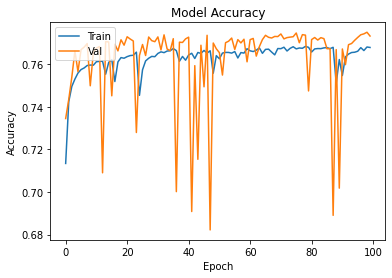

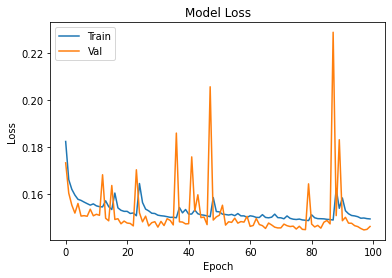

In [100]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [101]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.73%


In [102]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 58.19%
accuracy: 16.27%
accuracy: 48.27%
accuracy: 63.31%
accuracy: 89.42%
accuracy: 46.87%
accuracy: 47.30%


In [103]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 173091 samples, validate on 43273 samples
Epoch 1/50
173091/173091 [==============================] - 14s 78us/step - loss: 0.1826 - accuracy: 0.7114 - val_loss: 0.2049 - val_accuracy: 0.6723
Epoch 2/50
173091/173091 [==============================] - 12s 71us/step - loss: 0.1718 - accuracy: 0.7316 - val_loss: 0.1607 - val_accuracy: 0.7492
Epoch 3/50
173091/173091 [==============================] - 12s 71us/step - loss: 0.1643 - accuracy: 0.7444 - val_loss: 0.1608 - val_accuracy: 0.7426
Epoch 4/50
173091/173091 [==============================] - 17s 98us/step - loss: 0.1625 - accuracy: 0.7471 - val_loss: 0.1545 - val_accuracy: 0.7642
Epoch 5/50
173091/173091 [==============================] - 13s 77us/step - loss: 0.1606 - accuracy: 0.7504 - val_loss: 0.1543 - val_accuracy: 0.7630
Epoch 6/50
173091/173091 [==============================] - 13s 77us/step - loss: 0.1600 - accuracy: 0.7516 - val_loss: 0.1532 - val_accuracy: 0.7659
Epoch 7/50
173091/173091 [=======================

In [104]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.01%


In [105]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 41.44%
accuracy: 17.26%
accuracy: 48.01%
accuracy: 43.53%
accuracy: 89.15%
accuracy: 44.08%
accuracy: 40.99%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [107]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [109]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 89.00787561701577
Test Prediction Score 86.114140984637


In [110]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 51.093333333333334
Test Prediction Score 18.043333333333333
Test Prediction Score 58.973333333333336
Test Prediction Score 50.99333333333333
Test Prediction Score 87.28333333333333
Test Prediction Score 52.46333333333333
Test Prediction Score 59.44666666666667


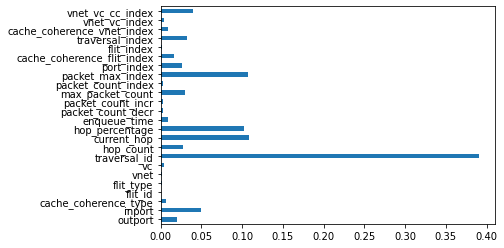

In [111]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

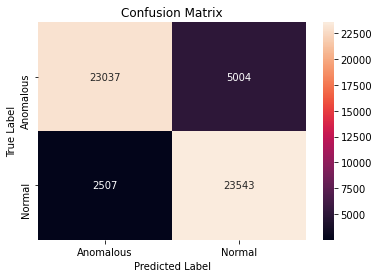

In [112]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [113]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     28041
           1       0.82      0.90      0.86     26050

    accuracy                           0.86     54091
   macro avg       0.86      0.86      0.86     54091
weighted avg       0.86      0.86      0.86     54091



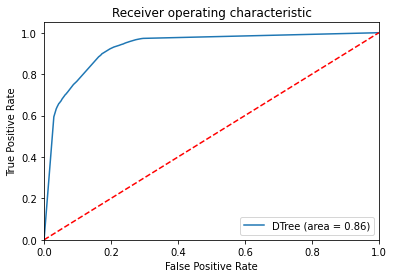

In [114]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [116]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [118]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 92.24639958588305
Test Prediction Score 87.59313009557968


In [119]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 51.2
Test Prediction Score 15.57
Test Prediction Score 58.98
Test Prediction Score 51.476666666666674
Test Prediction Score 89.58666666666667
Test Prediction Score 53.236666666666665
Test Prediction Score 49.42333333333334


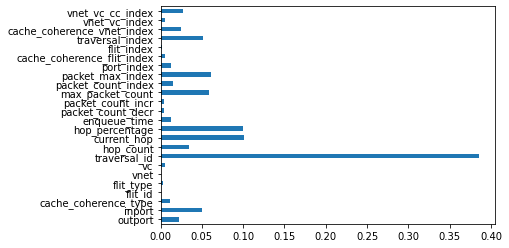

In [120]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

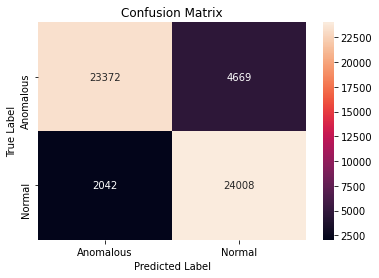

In [121]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [122]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87     28041
           1       0.84      0.92      0.88     26050

    accuracy                           0.88     54091
   macro avg       0.88      0.88      0.88     54091
weighted avg       0.88      0.88      0.88     54091



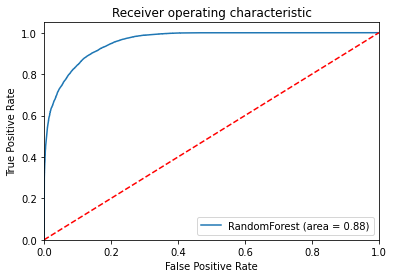

In [123]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [125]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [127]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.45630511545359
Test Prediction Score 91.76387938843801


In [128]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 84.48666666666666
Test Prediction Score 8.373333333333335
Test Prediction Score 69.3
Test Prediction Score 87.94666666666666
Test Prediction Score 94.93
Test Prediction Score 84.42333333333333
Test Prediction Score 85.26


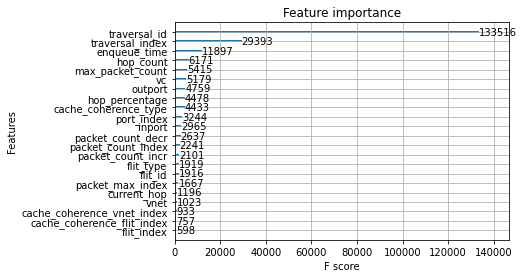

In [129]:
plot_importance(xgbc)
plt.show()

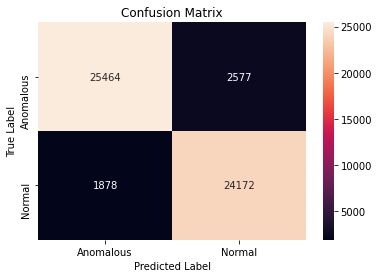

In [130]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [131]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     28041
           1       0.90      0.93      0.92     26050

    accuracy                           0.92     54091
   macro avg       0.92      0.92      0.92     54091
weighted avg       0.92      0.92      0.92     54091



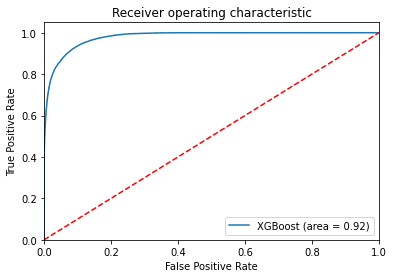

In [132]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [134]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [136]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 83.26708694607235
Test Prediction Score 82.13196280342386


In [137]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 81.06
Test Prediction Score 8.73
Test Prediction Score 72.71
Test Prediction Score 83.68333333333334
Test Prediction Score 94.66
Test Prediction Score 81.45666666666666
Test Prediction Score 75.90666666666667


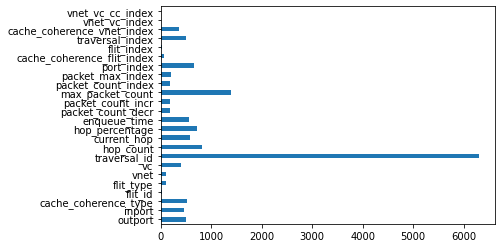

In [138]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

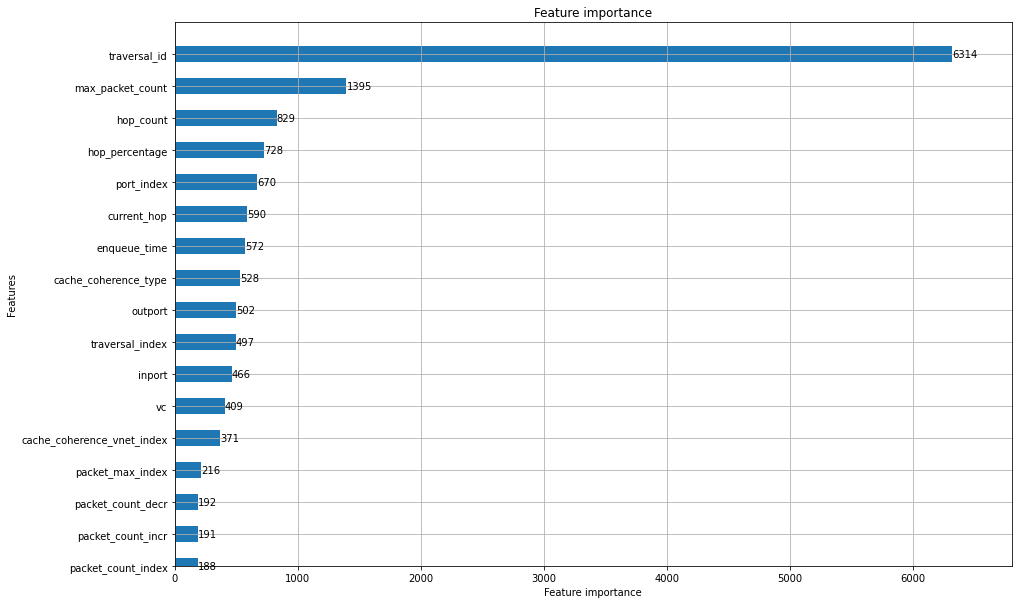

In [139]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [140]:
sorted(gbm.feature_importances_,reverse=True)

[6314,
 1395,
 829,
 728,
 670,
 590,
 572,
 528,
 502,
 497,
 466,
 409,
 371,
 216,
 192,
 191,
 188,
 115,
 102,
 69,
 28,
 24,
 4,
 0]

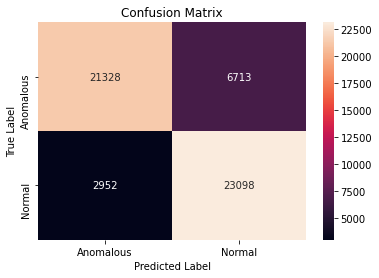

In [141]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [142]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82     28041
           1       0.77      0.89      0.83     26050

    accuracy                           0.82     54091
   macro avg       0.83      0.82      0.82     54091
weighted avg       0.83      0.82      0.82     54091



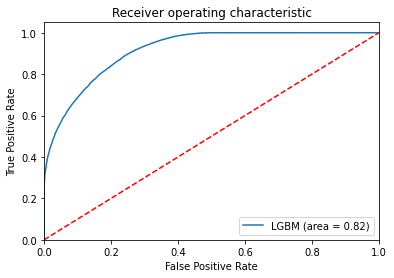

In [143]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()